# Wordle Solver

Observing different data sets

In [1]:
import pandas as pd
import math
import random
import heapq
from itertools import product
import collections
import pickle


data = pd.read_csv('possible_words.txt')

df = pd.DataFrame(data)

words_list = df['Possible_words']

allowed_data = pd.read_csv('Allowed_words.txt')

all_df = pd.DataFrame(allowed_data)

allowed_words = all_df['Allowed']


In [2]:
game_words = words_list
words_list = set(words_list)
allowed_words = set(allowed_words)
n = len(words_list)

In [3]:
chars = [0,1,2]
possible_results = []
for i in product(chars,repeat = 5):
    possible_results.append(i)

In [4]:
possible_results = [list(i) for i in possible_results]
possible_results

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 2],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 1, 2],
 [0, 0, 0, 2, 0],
 [0, 0, 0, 2, 1],
 [0, 0, 0, 2, 2],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 2],
 [0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1],
 [0, 0, 1, 1, 2],
 [0, 0, 1, 2, 0],
 [0, 0, 1, 2, 1],
 [0, 0, 1, 2, 2],
 [0, 0, 2, 0, 0],
 [0, 0, 2, 0, 1],
 [0, 0, 2, 0, 2],
 [0, 0, 2, 1, 0],
 [0, 0, 2, 1, 1],
 [0, 0, 2, 1, 2],
 [0, 0, 2, 2, 0],
 [0, 0, 2, 2, 1],
 [0, 0, 2, 2, 2],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 0, 2],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 0, 1, 2],
 [0, 1, 0, 2, 0],
 [0, 1, 0, 2, 1],
 [0, 1, 0, 2, 2],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 2],
 [0, 1, 1, 1, 0],
 [0, 1, 1, 1, 1],
 [0, 1, 1, 1, 2],
 [0, 1, 1, 2, 0],
 [0, 1, 1, 2, 1],
 [0, 1, 1, 2, 2],
 [0, 1, 2, 0, 0],
 [0, 1, 2, 0, 1],
 [0, 1, 2, 0, 2],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 1],
 [0, 1, 2, 1, 2],
 [0, 1, 2, 2, 0],
 [0, 1, 2, 2, 1],
 [0, 1, 2, 2, 2],
 [0, 2, 0, 0, 0],
 [0, 2, 0,

This function is used to retrieve the list of words.

input: none

output: set of words

In [5]:
def get_words():
    data = pd.read_csv('possible_words.txt')
    df = pd.DataFrame(data)
    words = df['Possible_words']
    words = set(words)
    return words
    

0 - Grey
1 - Yellow
2 - Green

In [7]:
def wordle_output(value,answer):
    res = [0]*5
    count = collections.Counter(answer)
    for i in range(5):
        if value[i] == answer[i]:
            res[i] = 2
            count[value[i]] -= 1
    for i in range(5):
        if res[i] == 0 and value[i] in count and count[value[i]] != 0:
            count[value[i]] -= 1
            res[i] = 1
    return res



In [8]:
def information(value,result,words):
#     info = 0
    new_possible_answers = set()
    for word in words:
        if wordle_output(value,word) == result:
            new_possible_answers.add(word)
    prob = len(new_possible_answers)/len(words)
    if prob != 0:
        info = (-1)*(math.log2(prob))
    return prob,new_possible_answers              

In [9]:
def expected_information(value,words):
    ent = 0
    for result in possible_results:
        prob,lex = information(value,result,words)
        if prob != 0:
            ent += (-1)*prob*(math.log2(prob))
#         print(ent,result)
    return ent      

In [19]:
def next_guess(words):
    possible_guesses = set()
    ent_all_words = collections.defaultdict(set)
    minHeap = []
#     print("Possible answers",len(words))
    if len(words) == 1:
        return words.pop()
    for w in words_list:
        ent = expected_information(w,words)
        ent = round(ent,3)
        ent_all_words[ent].add(w)
        heapq.heappush(minHeap, -ent)
    e = heapq.heappop(minHeap)
    g = words & ent_all_words[-e]
    if g: return g.pop()
    return ent_all_words[-e].pop()


In [6]:
file = open('file.pkl','rb')
look_up = pickle.load(file)
look_up

{(0, 0, 0, 0, 0): ['mulch',
  {'block',
   'blond',
   'blood',
   'bloom',
   'blown',
   'bluff',
   'blunt',
   'bobby',
   'bongo',
   'booby',
   'booth',
   'booty',
   'boozy',
   'botch',
   'bough',
   'bound',
   'buddy',
   'buggy',
   'bulky',
   'bully',
   'bunch',
   'bunny',
   'butch',
   'buxom',
   'chock',
   'chuck',
   'chump',
   'chunk',
   'clock',
   'cloth',
   'cloud',
   'clout',
   'clown',
   'cluck',
   'clump',
   'clung',
   'colon',
   'comfy',
   'conch',
   'condo',
   'couch',
   'cough',
   'could',
   'count',
   'coyly',
   'dodgy',
   'dolly',
   'donut',
   'doubt',
   'dough',
   'dowdy',
   'downy',
   'duchy',
   'dully',
   'dummy',
   'dumpy',
   'dutch',
   'flock',
   'flood',
   'flout',
   'flown',
   'fluff',
   'flung',
   'flunk',
   'foggy',
   'folly',
   'found',
   'fully',
   'funky',
   'funny',
   'fuzzy',
   'ghoul',
   'gloom',
   'glyph',
   'godly',
   'golly',
   'goody',
   'goofy',
   'gulch',
   'gully',
   'gumbo',


In [124]:
best = []
for w in words_list:
    best.append((expected_information(w,words_list),w))


In [128]:
best.sort(reverse = True)
best

[(5.878302956493169, 'raise'),
 (5.855819244109515, 'slate'),
 (5.835215982633284, 'crate'),
 (5.8327988809409055, 'irate'),
 (5.8304291080797555, 'trace'),
 (5.821023459282914, 'arise'),
 (5.806888622249769, 'stare'),
 (5.768678157325961, 'snare'),
 (5.767804897087286, 'arose'),
 (5.751562008954046, 'least'),
 (5.744211188991762, 'alert'),
 (5.7410113201652955, 'crane'),
 (5.738263819559774, 'stale'),
 (5.733998546845605, 'saner'),
 (5.713372336368849, 'alter'),
 (5.707287214774777, 'later'),
 (5.696507075549459, 'react'),
 (5.68392122181849, 'trade'),
 (5.683771188478658, 'leant'),
 (5.6520712086857685, 'learn'),
 (5.648431350783485, 'roast'),
 (5.648077618641163, 'cater'),
 (5.635641642534595, 'aisle'),
 (5.634291214967142, 'trice'),
 (5.630156106670124, 'parse'),
 (5.628408586744338, 'scare'),
 (5.622136469693717, 'saute'),
 (5.612255574516925, 'heart'),
 (5.6112819733074915, 'alone'),
 (5.610713777559601, 'store'),
 (5.607061114370462, 'alien'),
 (5.605482704800804, 'share'),
 (5.

In [16]:
file = open('guess2.pkl','rb')
look_up_2nd_guess = pickle.load(file)
look_up_2nd_guess

{(0, 0, 0, 0, 0): ['goody',
  {'bobby',
   'bongo',
   'booby',
   'booty',
   'boozy',
   'dodgy',
   'dowdy',
   'downy',
   'foggy',
   'goody',
   'goofy',
   'known',
   'poppy',
   'toddy',
   'woody',
   'woozy'}]}

The function below is a test bot to play wordle on a random word and try to return the score based on the number of guesses

In [235]:
def test_bot(answer = " "):
    words = get_words()
    if answer == " ":
        answer = random.choices(game_words, k=1)[0]
    score = 0
    guess = 'raise'
    for i in range(5):
        res = wordle_output(guess,answer)
        if res == [2,2,2,2,2]:
            print("Score",i+1,answer)
            return i+1
        if i == 0:
            guess,words = look_up[tuple(res)]
        else:
            prob,words = information(guess,res,words)
            guess = next_guess(words)

    print("The answer is:",answer)
    print('Failed')
    return 99

Demonstration of the test_bot

In [237]:
test_bot('block')

Score 4 block


4

In [233]:
avg_score = 0

for i in range(100):
    avg_score += test_bot()
print(avg_score/100)

Score 4 crone
Score 3 frisk
Score 4 truly
Score 4 login
Score 3 trope
Score 3 booze
Score 4 crave
Score 4 lowly
Score 3 squad
Score 3 fauna
Score 4 brawl
Score 4 began
Score 3 sperm
Score 4 crump
Score 3 axion
Score 3 edify
Score 3 sense
Score 4 urban
Score 3 gaffe
Score 3 crust
Score 4 basic
Score 3 edify
Score 4 topaz
Score 4 vixen
Score 3 swear
Score 4 quash
Score 3 ennui
Score 3 acute
Score 4 vapor
Score 3 unite
Score 3 navel
Score 4 pasty
Score 3 stack
Score 4 stoop
Score 3 crumb
Score 4 geeky
Score 3 burst
Score 4 zebra
Score 4 dally
Score 4 baler
Score 4 glade
Score 4 abhor
Score 4 nylon
Score 4 queue
Score 4 hinge
Score 4 troop
Score 4 bunny
Score 3 patsy
Score 5 fiber
Score 4 cloud
Score 4 bulky
Score 4 speck
Score 3 spore
Score 2 strip
Score 3 weigh
Score 3 dwell
Score 4 child
Score 4 pooch
Score 4 petal
Score 4 queue
Score 2 miser
Score 3 sunny
Score 4 goose
Score 4 mogul
Score 3 shank
Score 3 stash
Score 4 speck
Score 5 gland
Score 2 stein
Score 3 brake
Score 3 score
Score 

The below function is used to play the wordle on the official site it shows you the guess to pick

inputs: value - our previous guess, result - output for our guess, words - set of words

output: prints the word to try in the next guess, words - updates set of words 

In [29]:
guess,words = look_up[tuple(result)]
words

{'block',
 'blond',
 'blood',
 'bloom',
 'blown',
 'bluff',
 'blunt',
 'bobby',
 'bongo',
 'booby',
 'booth',
 'booty',
 'boozy',
 'botch',
 'bough',
 'bound',
 'buddy',
 'buggy',
 'bulky',
 'bully',
 'bunch',
 'bunny',
 'butch',
 'buxom',
 'chock',
 'chuck',
 'chump',
 'chunk',
 'clock',
 'cloth',
 'cloud',
 'clout',
 'clown',
 'cluck',
 'clump',
 'clung',
 'colon',
 'comfy',
 'conch',
 'condo',
 'couch',
 'cough',
 'could',
 'count',
 'coyly',
 'dodgy',
 'dolly',
 'donut',
 'doubt',
 'dough',
 'dowdy',
 'downy',
 'duchy',
 'dully',
 'dummy',
 'dumpy',
 'dutch',
 'flock',
 'flood',
 'flout',
 'flown',
 'fluff',
 'flung',
 'flunk',
 'foggy',
 'folly',
 'found',
 'fully',
 'funky',
 'funny',
 'fuzzy',
 'ghoul',
 'gloom',
 'glyph',
 'godly',
 'golly',
 'goody',
 'goofy',
 'gulch',
 'gully',
 'gumbo',
 'gummy',
 'guppy',
 'hobby',
 'holly',
 'hotly',
 'hound',
 'howdy',
 'humph',
 'hunch',
 'hunky',
 'hutch',
 'jolly',
 'jumbo',
 'jumpy',
 'junto',
 'knock',
 'knoll',
 'known',
 'lobby',


In [38]:
def suggest_word(value,result,words,turn):
    if result == [2,2,2,2,2]:
        print("We guessed it!!")
        words = get_words()
    if turn == 1:
        guess,words = look_up[tuple(result)]
    elif result == [0,0,0,0,0] and turn == 2:
        guess,words = look_up_2nd_guess[tuple(result)]
        
    else:
        prob,words = information(value,result,words)
        guess = next_guess(words)
    print("Try this word:",guess)
    return words

The below is demonstration with the official wordle game

In [39]:
words = get_words()

Use 0 - Grey 1- Yellow 2- Green

In [40]:
words = suggest_word('raise',[0,0,1,0,0],words,1)

Try this word: pilot


In [41]:
words = suggest_word('pilot',[0,1,0,0,0],words,2)

Try this word: undid


In [42]:
words = suggest_word('undid',[1,0,0,2,2],words,3)

Try this word: humid


As we can see humid is the correct answer

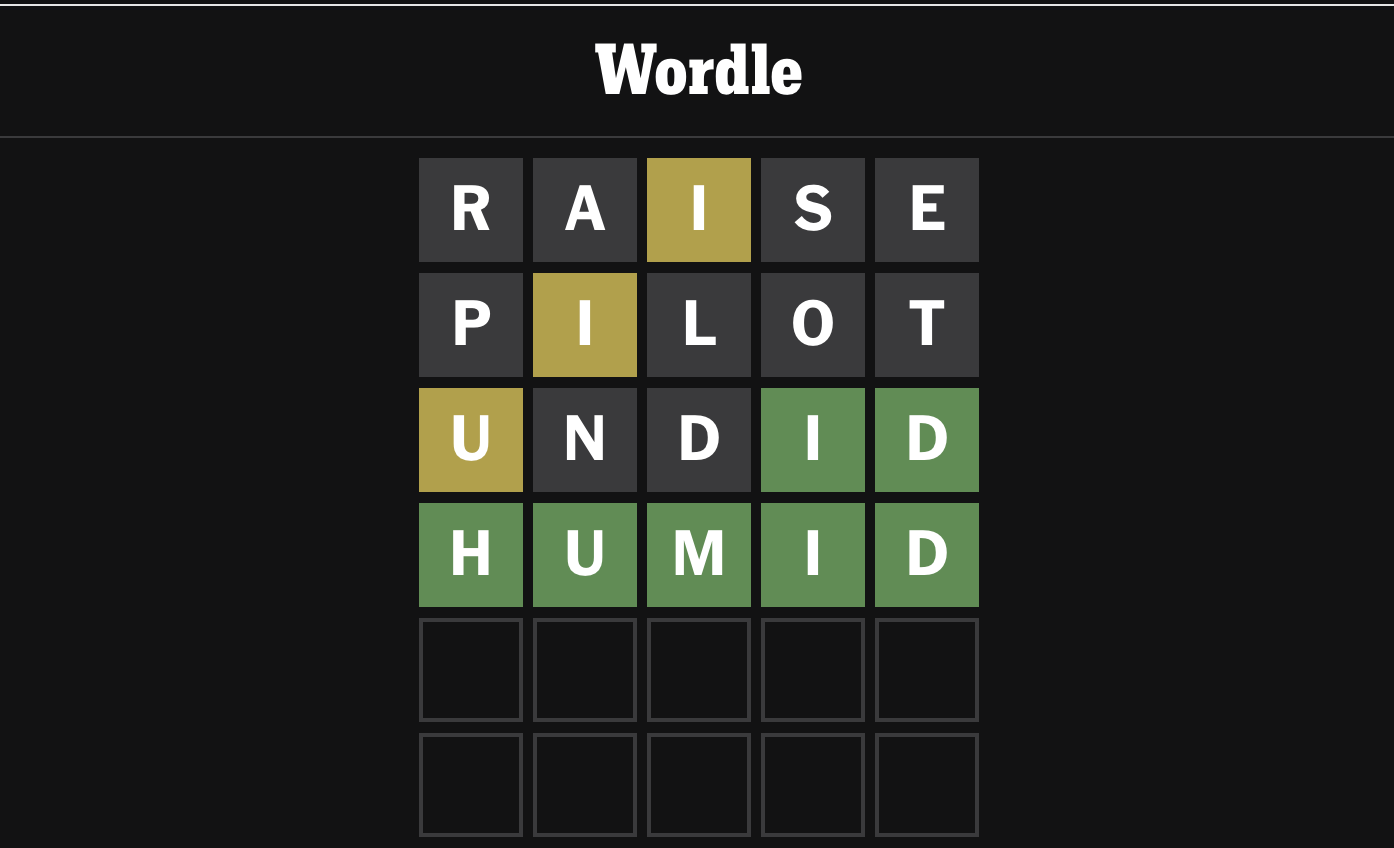

The official game can be played in the site below

https://www.nytimes.com/games/wordle/index.html